<a href="https://colab.research.google.com/github/om-umrania/Credit-Card-Fraud-Detection/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

## Load the File

In [ ]:
file_path = './creditcard.csv'
df = pd.read_csv(file_path)

# Data Preprocessing

## Display the first few rows of the DataFrame

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(11959, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


## Handing missing values using SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

### Initialize the SimpleImputer with the strategy to replace missing values with the mean

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Fit the imputer on the DataFrame and transform the data to fill missing values
# Convert the result back to a DataFrame with the original columns
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
print("Missing values after imputation:\n", df_imputed.isnull().sum())

Missing values after imputation:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Determine number of fraud cases in dataset

In [ ]:
fraud = df_imputed[df_imputed['Class'] == 1]
valid = df_imputed[df_imputed['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))

In [ ]:
print(f'Outlier Fraction: {outlierFraction}')
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Outlier Fraction: 0.004367545775239375
Fraud Cases: 52
Valid Transactions: 11906


#### Printing amount details of fraud transactions

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count      52.000000
mean       97.724808
std       321.188775
min         0.000000
25%         1.000000
50%         1.000000
75%         1.772500
max      1809.680000
Name: Amount, dtype: float64

#### Printing amount details of normal transactions

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    11906.000000
mean        62.198127
std        177.379105
min          0.000000
25%          5.292500
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

### Correlation matrix

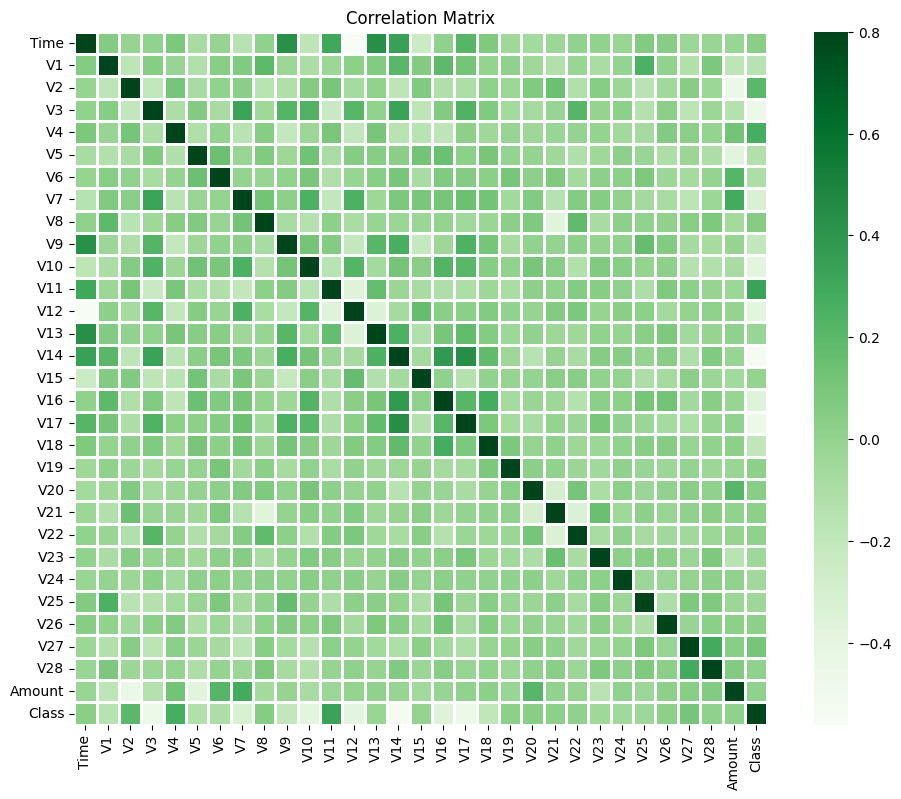

In [ ]:
# Calculate the correlation matrix
corrmat = df.corr()

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 9))

# Create a heatmap of the correlation matrix with specified figure size
sns.heatmap(corrmat, vmax=.8, square=True, cmap='Greens',linewidths=0.75, linecolor='white')
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = df_imputed.drop(['Class'], axis = 1)
Y = df_imputed["Class"]
print(X.shape)
print(Y.shape)

(11959, 30)
(11959,)


In [ ]:
# Ensure the target variable is encoded as integers (0 and 1)
Y = Y.astype(int)

# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y

## Train Test and Split

In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.impute import SimpleImputer # Import imputer to handle missing values

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Handle any potential missing values in train/test sets separately
# Impute missing values in X_train and X_test using the mean
X_train_imputed = imputer.fit_transform(xTrain)
X_test_imputed = imputer.transform(xTest)

# Logistic Regression

In [ ]:
# Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Logistic Regression with class balancing, increased max_iter, and feature scaling
lr = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
lr.fit(X_train_scaled, yTrain)
yPred = lr.predict(X_test_scaled)

# Print results
print("Logistic Regression with Improved Parameters")
print("Accuracy:", accuracy_score(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred))


Logistic Regression with Improved Parameters
Accuracy: 0.9882943143812709
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2382
           1       0.26      1.00      0.42        10

    accuracy                           0.99      2392
   macro avg       0.63      0.99      0.71      2392
weighted avg       1.00      0.99      0.99      2392



### Confusion Matrix

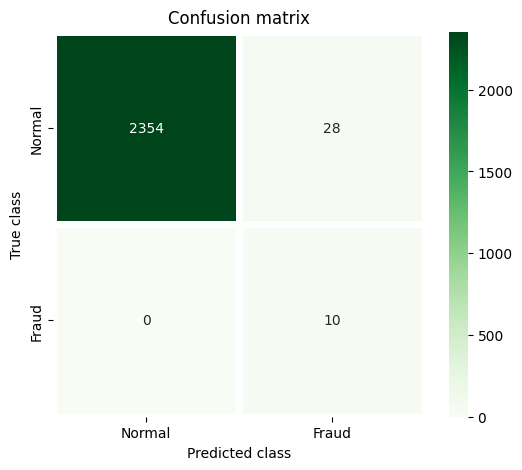

In [ ]:
from sklearn.metrics import confusion_matrix # Import confusion matrix

# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d", cmap='Greens', linewidths=5);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()